In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#shows all the columns
pd.set_option('display.max_columns',None)

In [2]:
dataset = pd.read_csv('train.csv')

In [3]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

# MISSING VALUES

In [4]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
features_nan = [features for features in dataset.columns if dataset[features].isnull().sum()>1]
for features in features_nan:
    
    print(features,':', np.round(dataset[features].isnull().mean()*100,4), '% missing values',',','Total',':' ,len(dataset[features]))

LotFrontage : 17.7397 % missing values , Total : 1460
Alley : 93.7671 % missing values , Total : 1460
MasVnrType : 0.5479 % missing values , Total : 1460
MasVnrArea : 0.5479 % missing values , Total : 1460
BsmtQual : 2.5342 % missing values , Total : 1460
BsmtCond : 2.5342 % missing values , Total : 1460
BsmtExposure : 2.6027 % missing values , Total : 1460
BsmtFinType1 : 2.5342 % missing values , Total : 1460
BsmtFinType2 : 2.6027 % missing values , Total : 1460
FireplaceQu : 47.2603 % missing values , Total : 1460
GarageType : 5.5479 % missing values , Total : 1460
GarageYrBlt : 5.5479 % missing values , Total : 1460
GarageFinish : 5.5479 % missing values , Total : 1460
GarageQual : 5.5479 % missing values , Total : 1460
GarageCond : 5.5479 % missing values , Total : 1460
PoolQC : 99.5205 % missing values , Total : 1460
Fence : 80.7534 % missing values , Total : 1460
MiscFeature : 96.3014 % missing values , Total : 1460


In [6]:
features_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [7]:
dataset[features_nan]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


# Relation between nan values and Sales Price

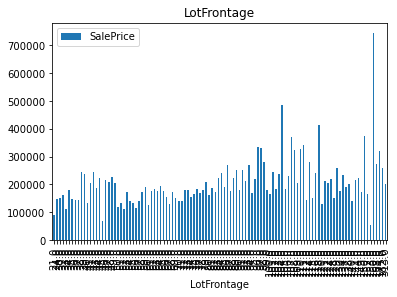

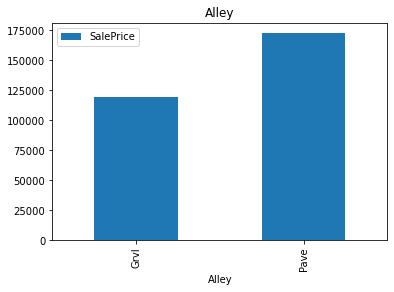

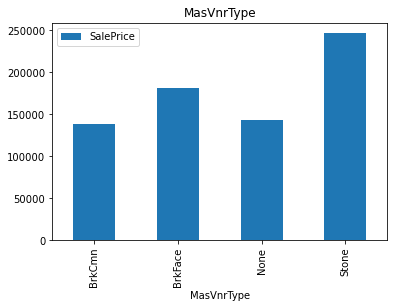

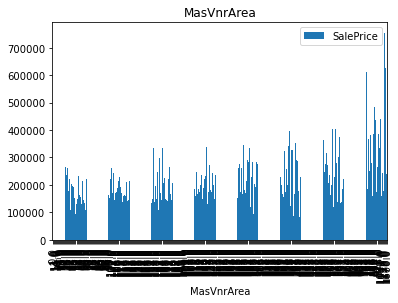

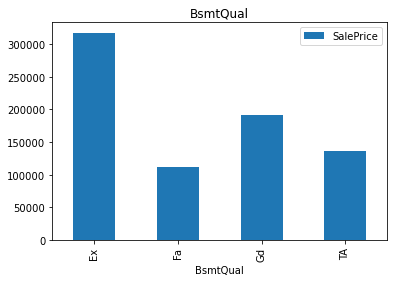

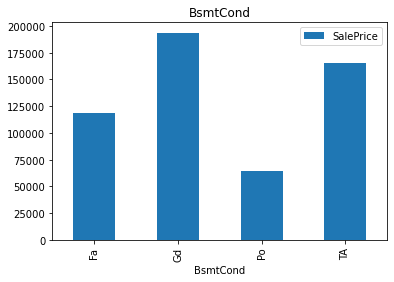

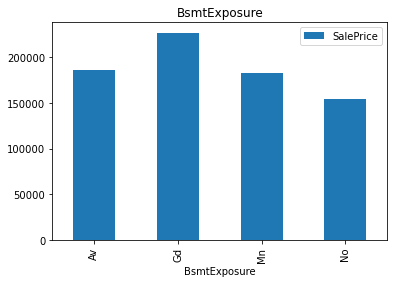

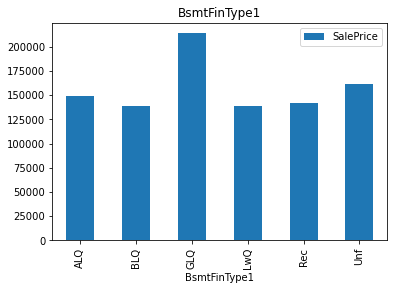

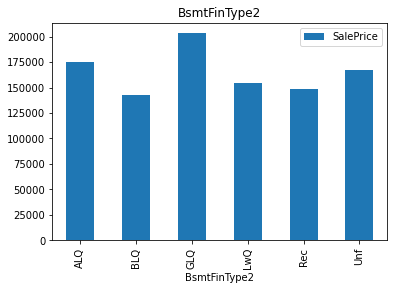

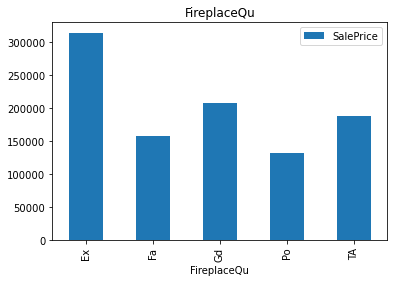

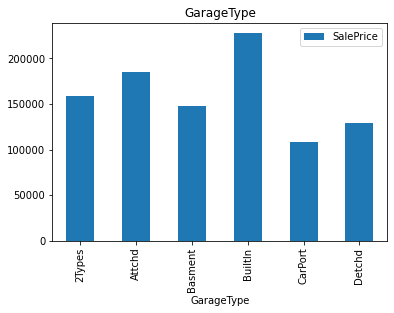

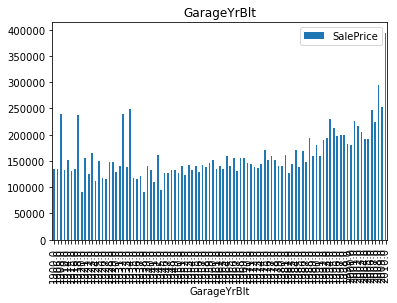

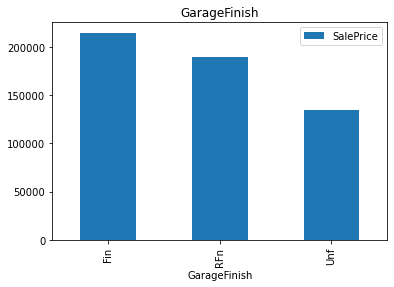

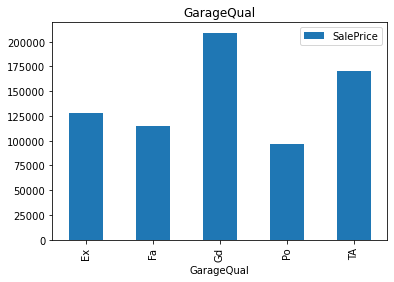

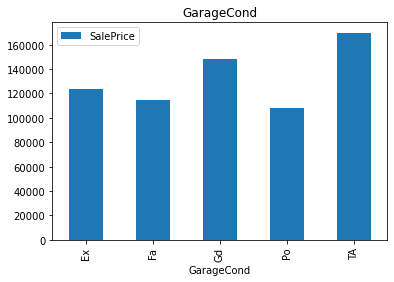

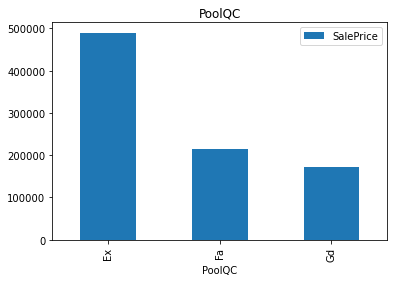

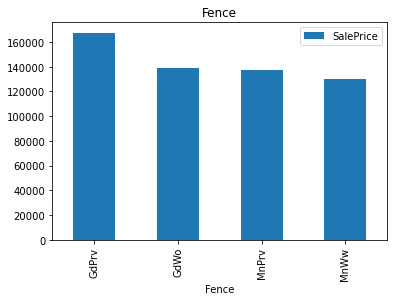

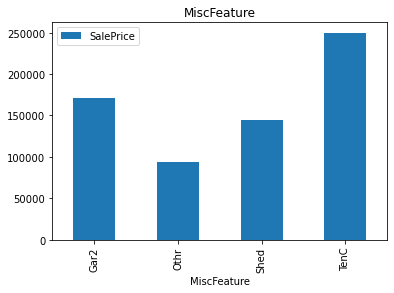

In [8]:
for feature in features_nan:
    
    data = dataset.copy()
    #data[feature]=np.where(data[feature].isnull(),0,1)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.legend()
    plt.show()
    

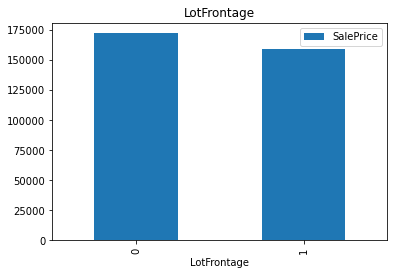

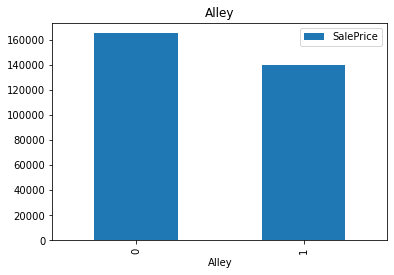

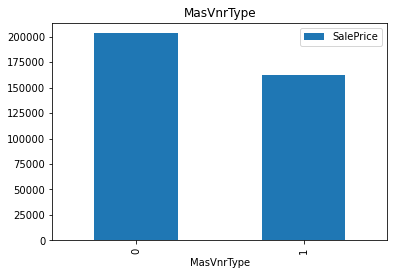

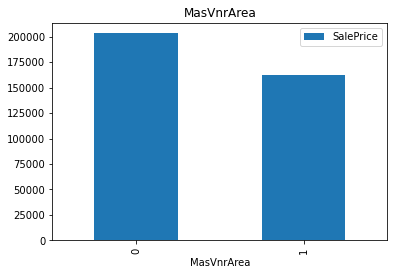

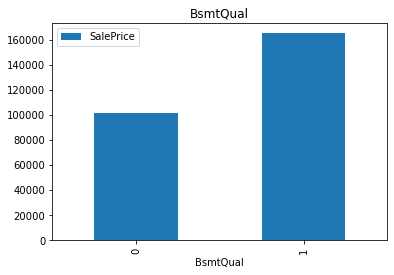

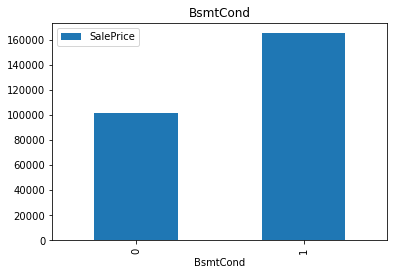

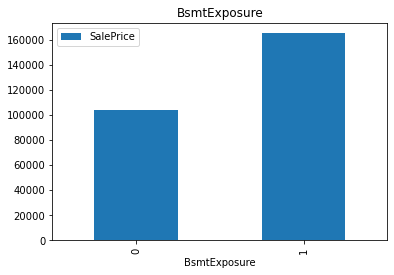

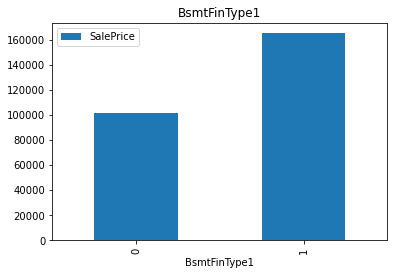

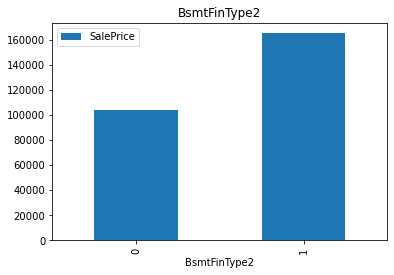

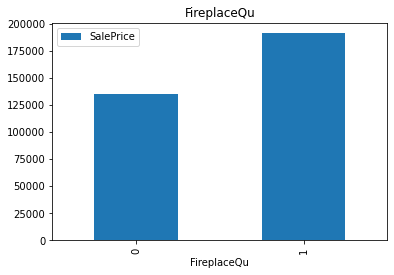

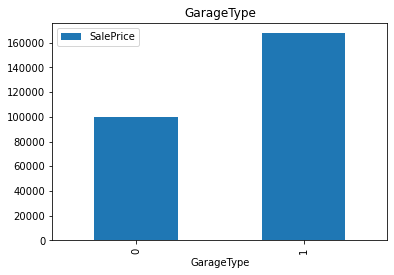

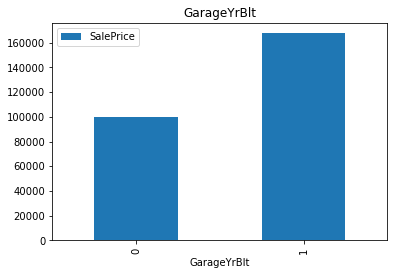

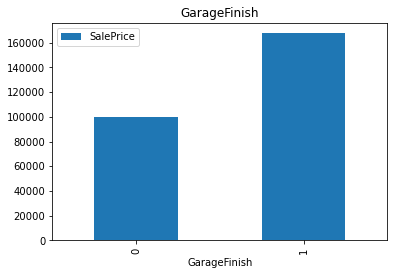

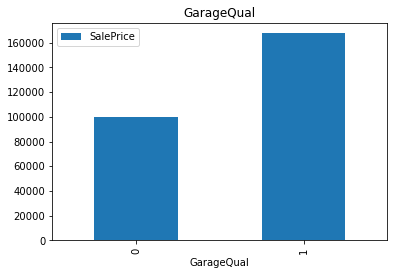

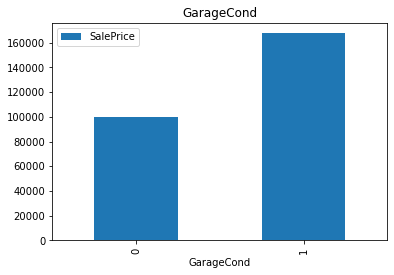

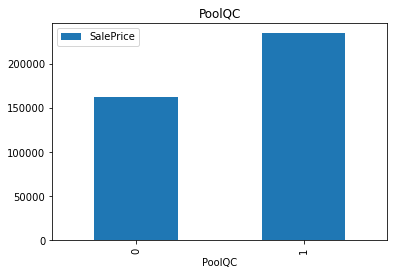

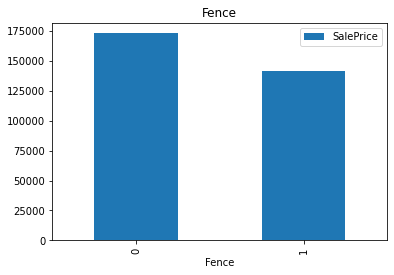

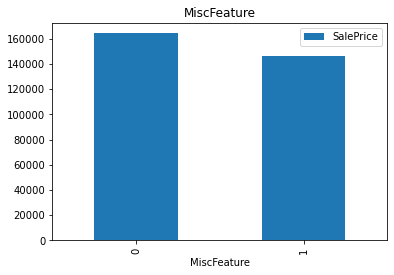

In [9]:
for feature in features_nan:
    
    data = dataset.copy()
    data[feature]=np.where(data[feature].isnull(),0,1)
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.legend()
    plt.show()

# Numerical Variables

In [10]:
num_feature = [feat for feat in dataset.columns if dataset[feat].dtype!='O']
dataset[num_feature]
    

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [11]:
num_feature

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

######year in numerical features

In [12]:
year_feature =[feat for feat in num_feature if 'Yr' in feat or 'Year' in feat] 

In [13]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [14]:
dataset[year_feature]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008
...,...,...,...,...
1455,1999,2000,1999.0,2007
1456,1978,1988,1978.0,2010
1457,1941,2006,1941.0,2010
1458,1950,1996,1950.0,2010


<AxesSubplot:xlabel='YrSold'>

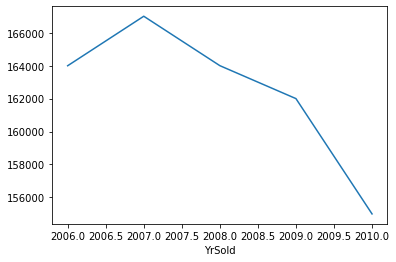

In [15]:
dataset.groupby('YrSold')['SalePrice'].median().plot()

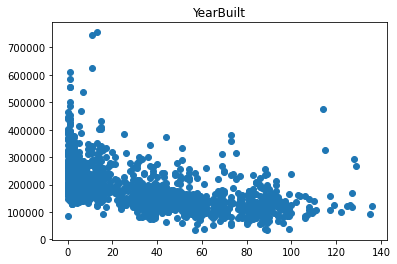

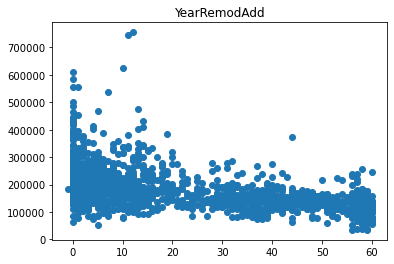

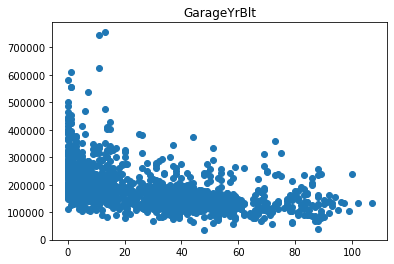

In [16]:
for f in year_feature:
    if f != 'YrSold':
        
        data = dataset.copy()
        data[f] = data['YrSold'] - data[f]
        plt.scatter(data[f],data['SalePrice'])
        plt.title(f)
        plt.show()
        
        

In [17]:
discrete_feature = [feat for feat in num_feature if len(dataset[feat].unique())<=25 and feat not in year_feature+['Id']]

for feat in discrete_feature:
    print(feat,',', 'Unique :', len(dataset[feat].unique()))

MSSubClass , Unique : 15
OverallQual , Unique : 10
OverallCond , Unique : 9
LowQualFinSF , Unique : 24
BsmtFullBath , Unique : 4
BsmtHalfBath , Unique : 3
FullBath , Unique : 4
HalfBath , Unique : 3
BedroomAbvGr , Unique : 8
KitchenAbvGr , Unique : 4
TotRmsAbvGrd , Unique : 12
Fireplaces , Unique : 4
GarageCars , Unique : 5
3SsnPorch , Unique : 20
PoolArea , Unique : 8
MiscVal , Unique : 21
MoSold , Unique : 12


In [18]:
dataset[discrete_feature]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,6,5,0,0,0,2,1,3,1,7,1,2,0,0,0,8
1456,20,6,6,0,1,0,2,0,3,1,7,2,2,0,0,0,2
1457,70,7,9,0,0,0,2,0,4,1,9,2,1,0,0,2500,5
1458,20,5,6,0,1,0,1,0,2,1,5,0,1,0,0,0,4


In [19]:
dataset['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1300        1
1400        1
3500        1
Name: MiscVal, dtype: int64

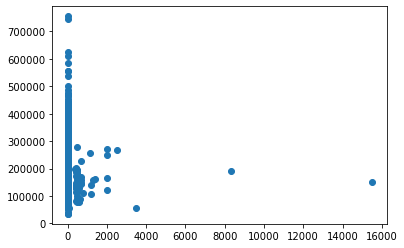

In [20]:
plt.scatter(dataset['MiscVal'],dataset['SalePrice'])

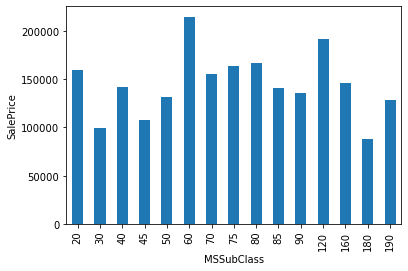

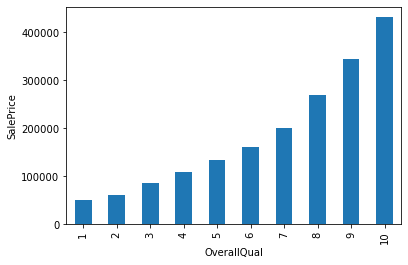

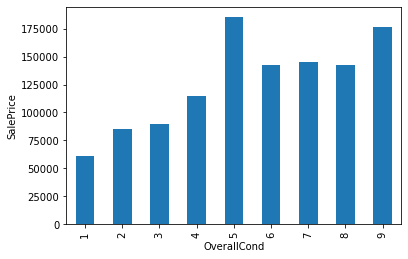

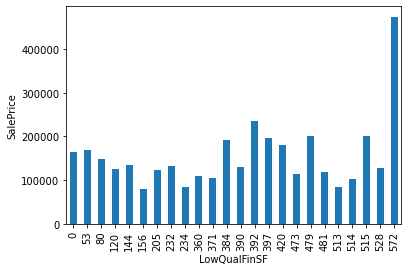

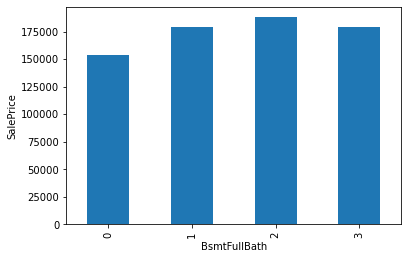

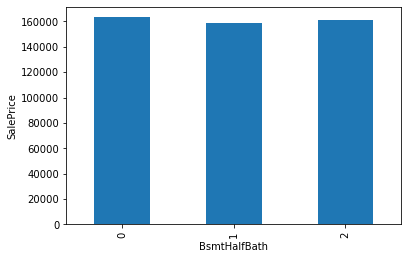

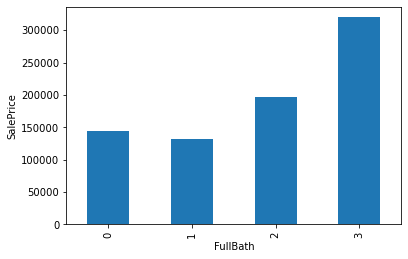

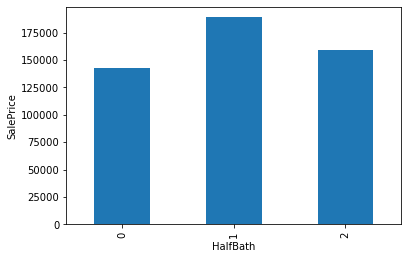

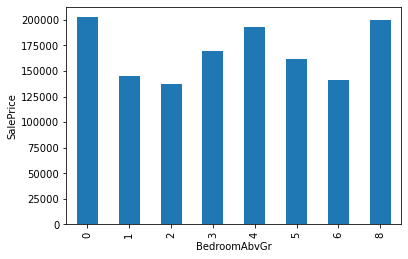

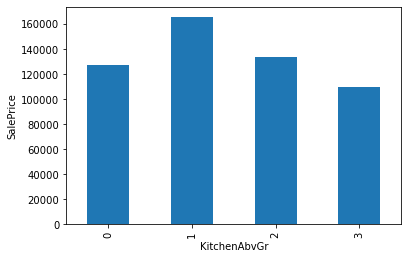

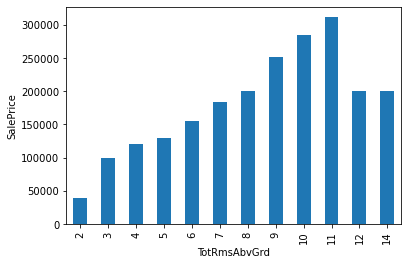

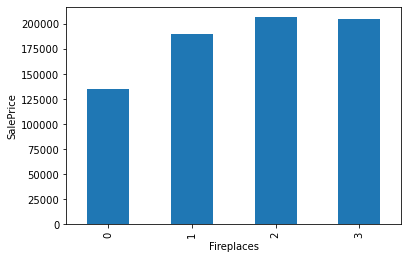

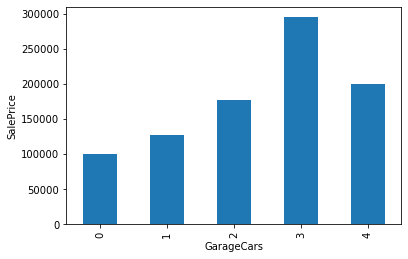

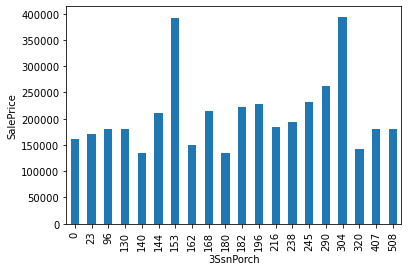

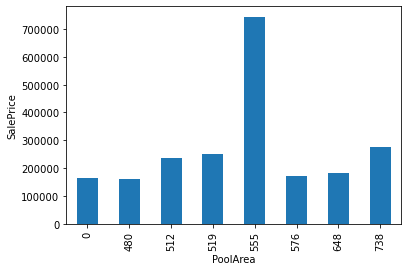

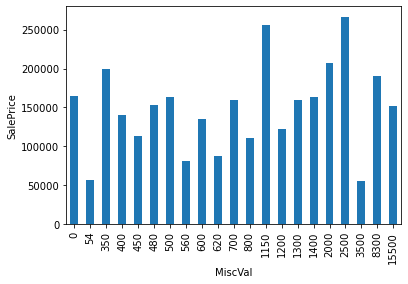

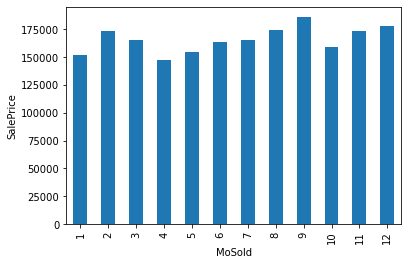

In [21]:
for feat in discrete_feature:
    data = dataset.copy()
    data.groupby(feat)['SalePrice'].median().plot.bar()
    plt.xlabel(feat)
    plt.ylabel('SalePrice')
    
    plt.show()
    

In [22]:
continuous_feature = [feat for feat in num_feature if feat not in discrete_feature+year_feature+['Id']]

In [23]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [24]:
dataset['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [25]:
dataset[continuous_feature]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,1710,548,0,61,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,1262,460,298,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,1786,608,0,42,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,1717,642,0,35,272,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,2198,836,192,84,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,1647,460,0,40,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,2073,500,349,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,2340,252,0,60,0,0,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,1078,240,366,0,112,0,142125


In [26]:
for feat in continuous_feature:
    print(feat,',','Unique :',len(dataset[feat].unique()))

LotFrontage , Unique : 111
LotArea , Unique : 1073
MasVnrArea , Unique : 328
BsmtFinSF1 , Unique : 637
BsmtFinSF2 , Unique : 144
BsmtUnfSF , Unique : 780
TotalBsmtSF , Unique : 721
1stFlrSF , Unique : 753
2ndFlrSF , Unique : 417
GrLivArea , Unique : 861
GarageArea , Unique : 441
WoodDeckSF , Unique : 274
OpenPorchSF , Unique : 202
EnclosedPorch , Unique : 120
ScreenPorch , Unique : 76
SalePrice , Unique : 663


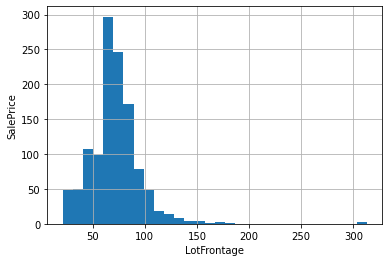

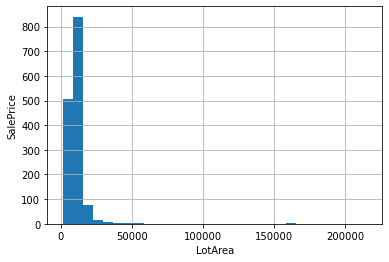

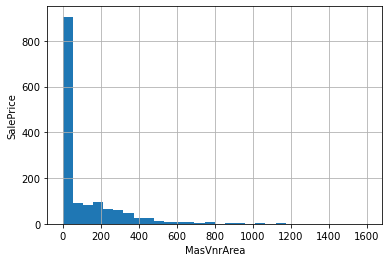

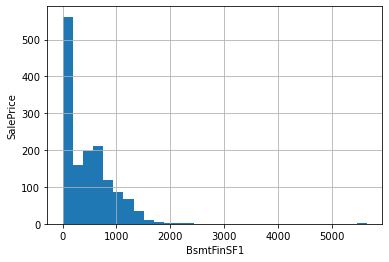

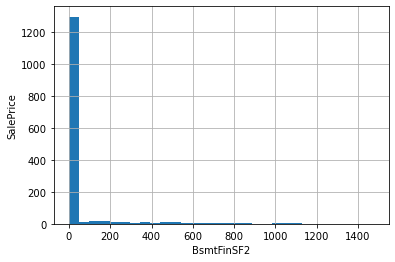

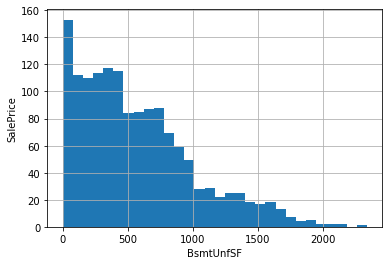

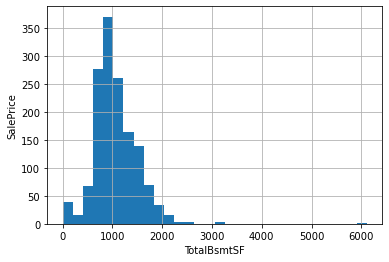

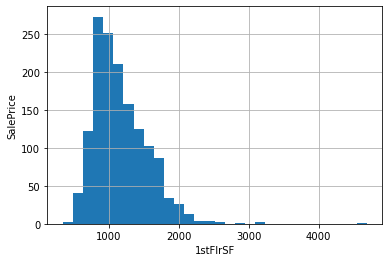

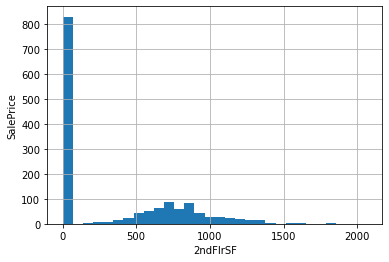

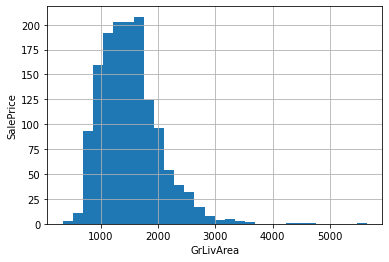

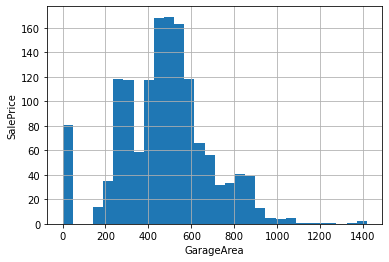

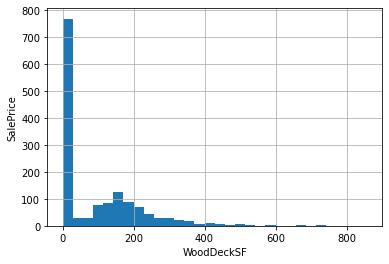

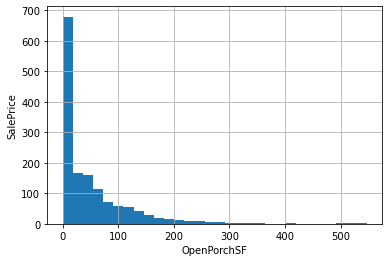

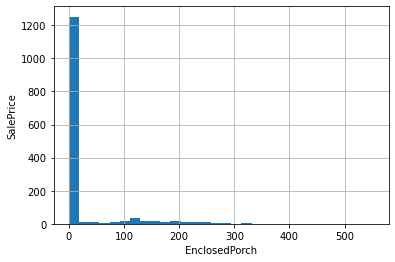

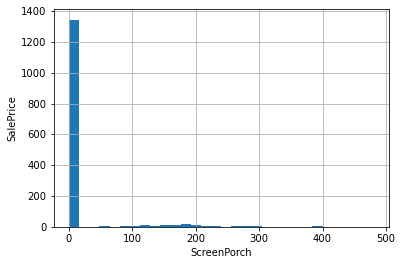

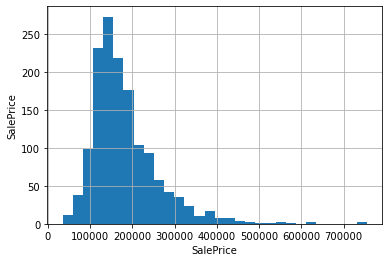

In [27]:
for feat in continuous_feature:
    dataset[feat].hist(bins=30)
    plt.xlabel(feat)
    plt.ylabel('SalePrice')
    plt.show()

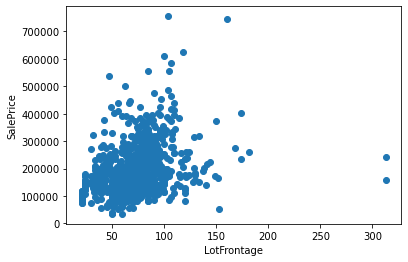

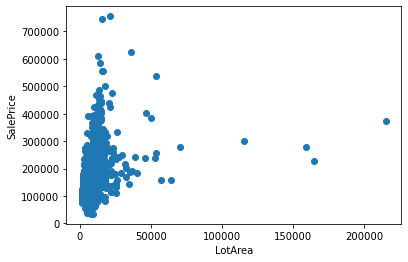

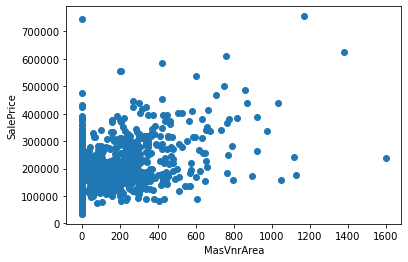

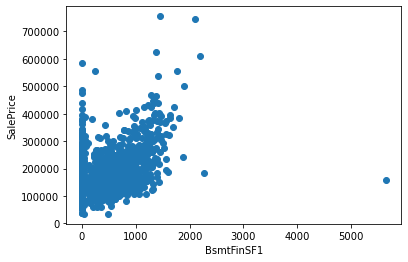

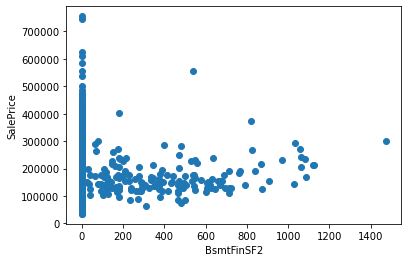

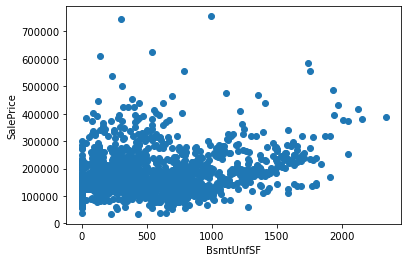

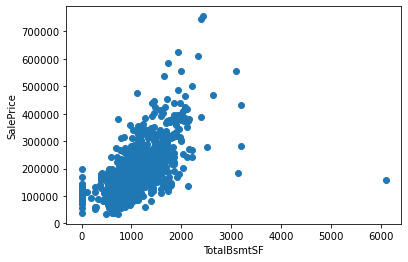

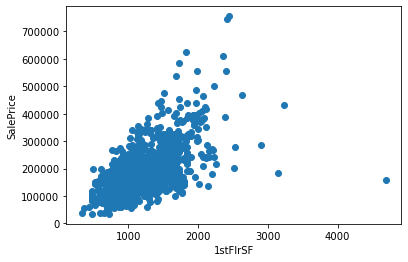

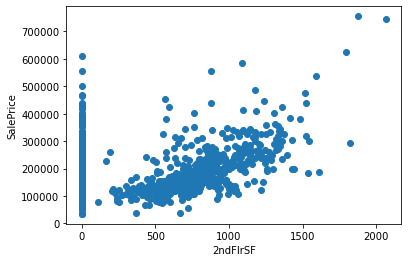

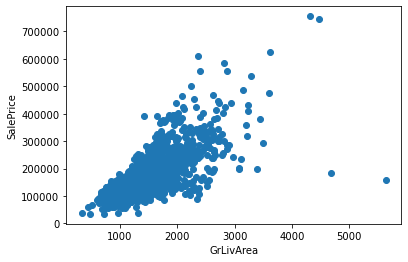

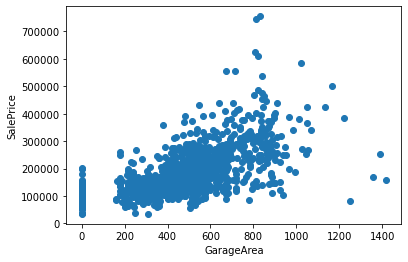

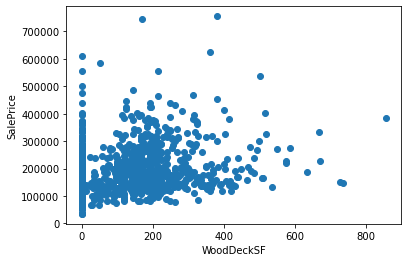

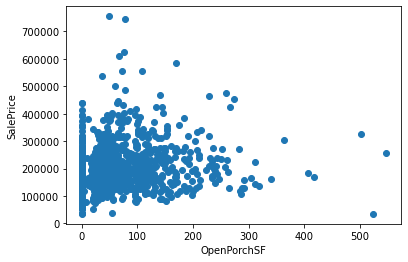

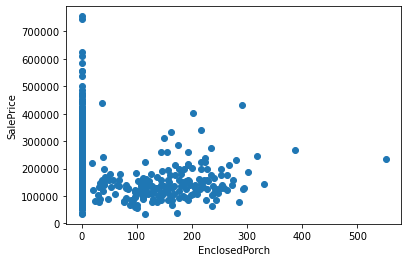

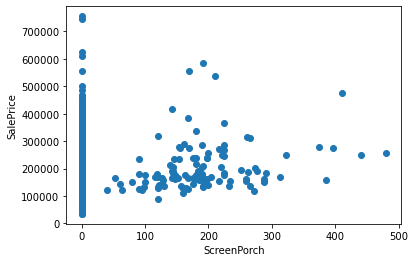

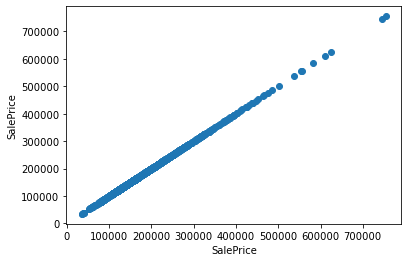

In [28]:
for feat in continuous_feature:
    data = dataset.copy()
    plt.scatter(data[feat],data['SalePrice'])
    plt.xlabel(feat)
    plt.ylabel('SalePrice')
    plt.show()

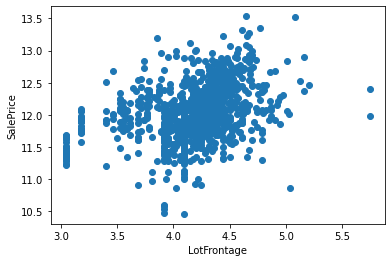

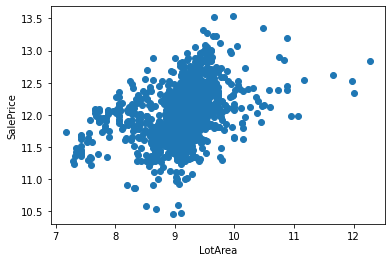

C:\Users\murad\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


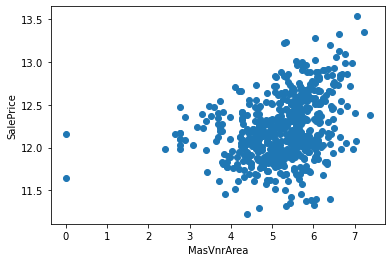

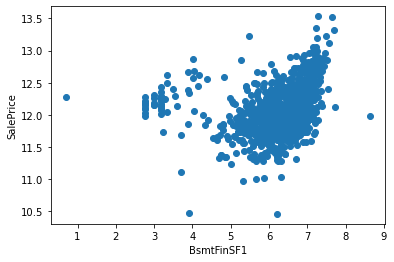

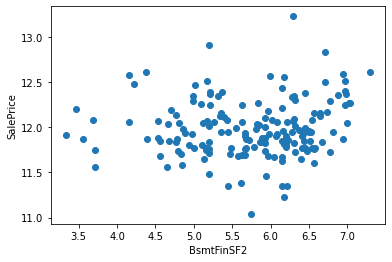

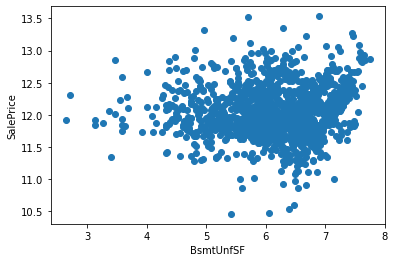

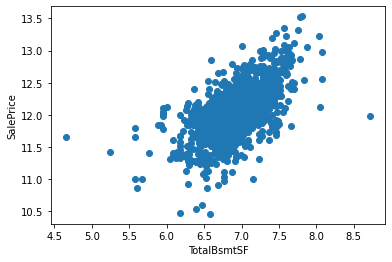

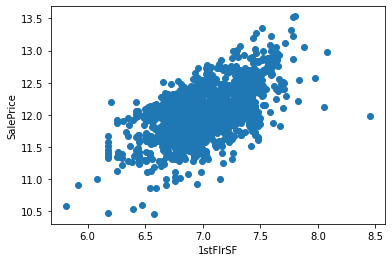

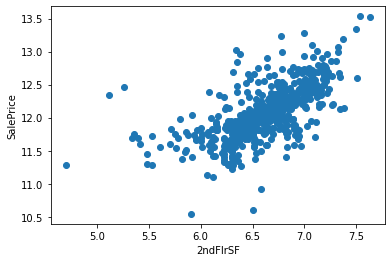

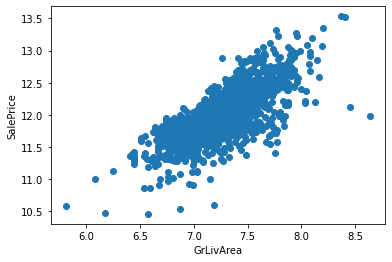

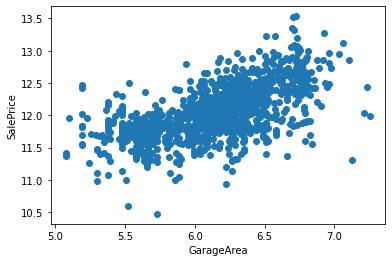

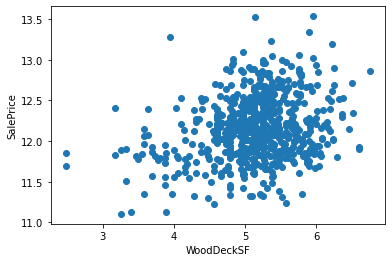

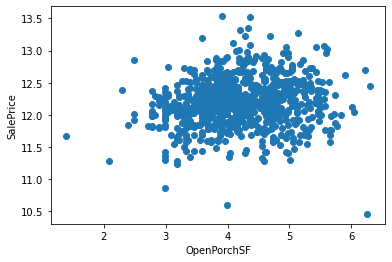

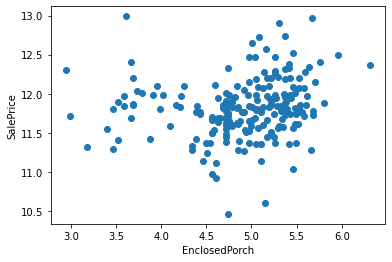

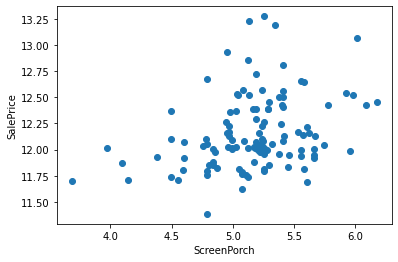

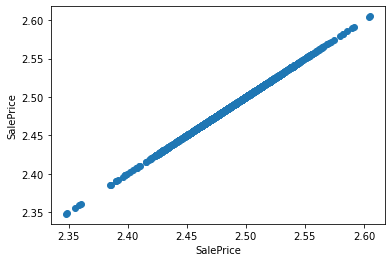

In [29]:
for feat in continuous_feature:
    data = dataset.copy()
    data[feat] = np.log(data[feat])
    data['SalePrice'] = np.log(data['SalePrice'])
    plt.scatter(data[feat],data['SalePrice'])
    
    plt.xlabel(feat)
    plt.ylabel('SalePrice')
    plt.show()

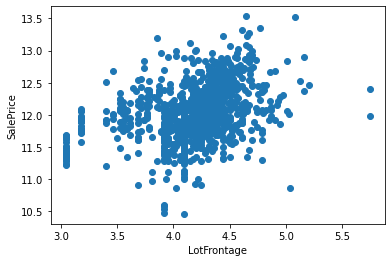

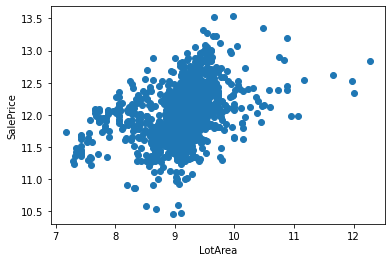

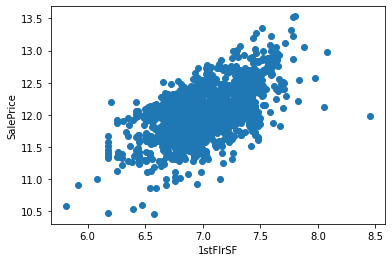

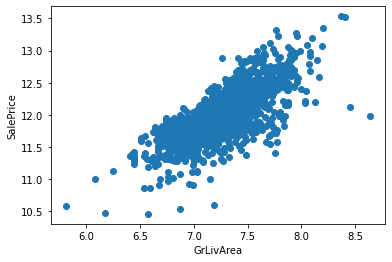

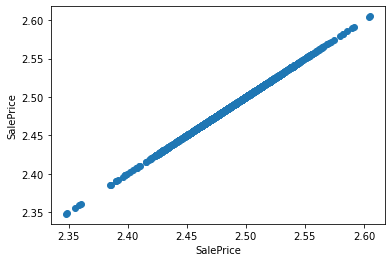

In [30]:
for feat in continuous_feature:
    data = dataset.copy()
    if 0 in data[feat].unique():
        pass
    else:
        
        data[feat] = np.log(data[feat])
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feat],data['SalePrice'])
        plt.xlabel(feat)
        plt.ylabel('SalePrice')
        plt.show()
        

# Outliers

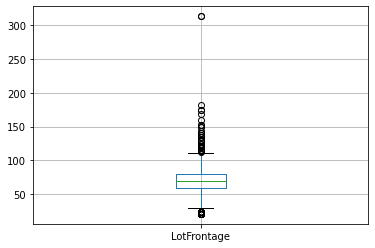

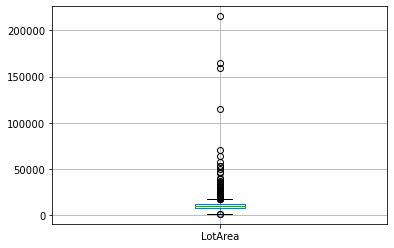

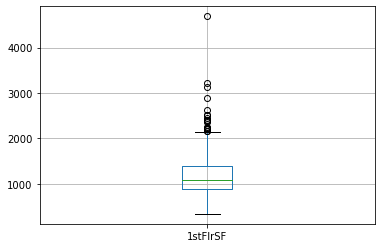

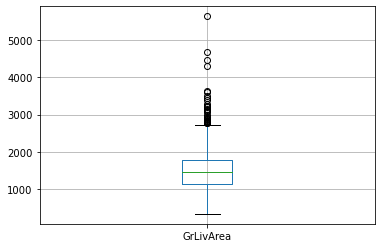

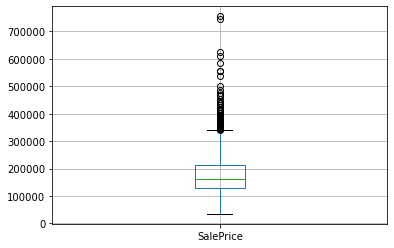

In [31]:
for feat in continuous_feature:
    data = dataset.copy()
    if 0 in data[feat].unique():
        pass
    else:
        data.boxplot(column=feat)
        
        
        plt.show()

In [32]:
for feat in continuous_feature:
    data = dataset.copy()
    unique = data[feat].unique()
    print(feat , unique)

LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea [ 8450  9600 11250 ... 17217 13175  9717]
MasVnrArea [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+

In [33]:
for feat in continuous_feature:
    data = dataset.copy()
    if 0  in data[feat].unique():
        unique = data[feat].unique()
        print(feat , unique)

MasVnrArea [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6.600e+01 2.200e+01
 2.840e+02 7.600e+01 2.030e+02 6.800e+01 1.830e+02 4.800e+01 2.800e+01
 3.360e+02 6.000e+02 7.680e+02 4.800e+02 2.200e+02 1.840e+02 1.129e+03
 1.160e+02 1.350e+02 2.660e+02 8.500e+01 3.090e+02 1.360e+02 2.880e+02
 7.000e+01 3.200e+02 5.000e+01 1.200e+02 4.360e+02 2.520e+02 8.400e+01
 6.640e+02 2.260e+02 3.000e+02 6.530e+02 1.120e+02 4.910e+02 2.680e+02
 7.480e+02 9.800e+01 2.750e+02 1.380e+02 2.050e+02 2.620e+02 1.280e+02
 2.600e+02 1.530e+02 6.400e+01 3.120e+02 1.600e+01 9.220e+02 1.420e+02
 2.900e+02 1.270e+02 5.060e+02 2.970e+02       nan 6.040e+02 2.540e+02
 3.600e+01 1.020e+02 4.720e+02 4.810e+02 1.080e+02 3.020e+02 1.720

In [34]:
dataset['BsmtFinSF1'].unique() ==0


array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [35]:
categorical_features = [feat for feat in dataset.columns if dataset[feat].dtype=='O']

In [36]:
dataset[categorical_features]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


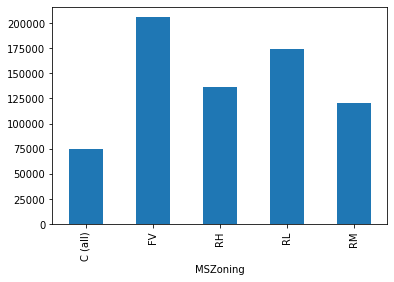

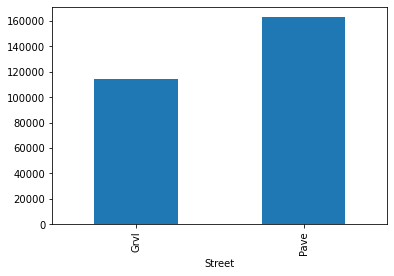

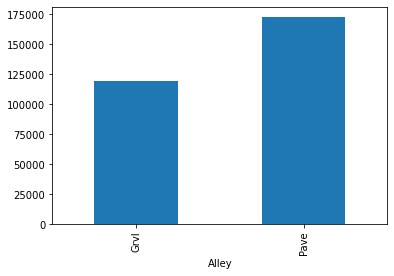

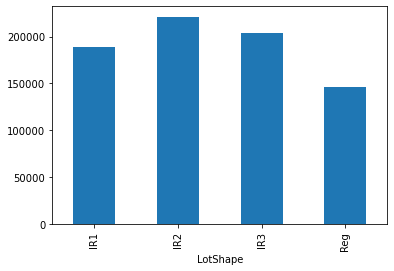

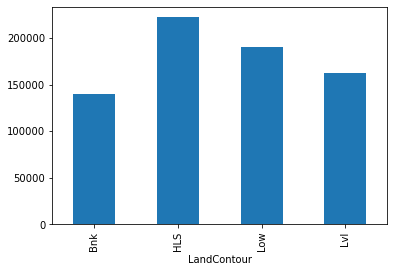

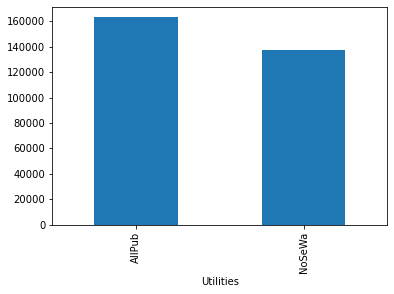

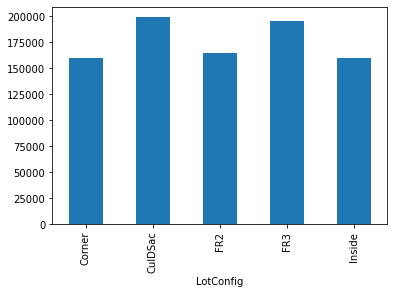

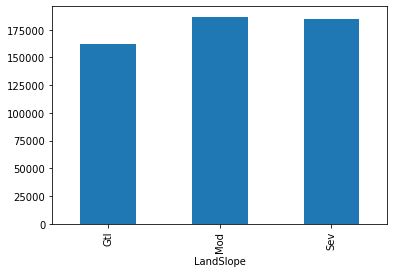

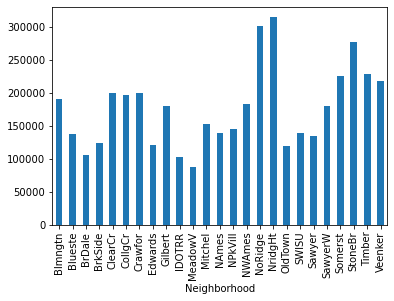

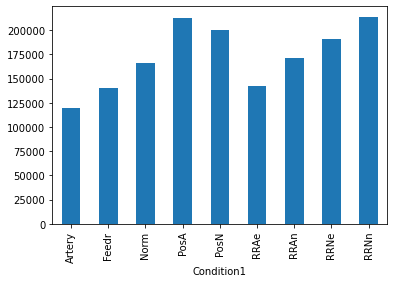

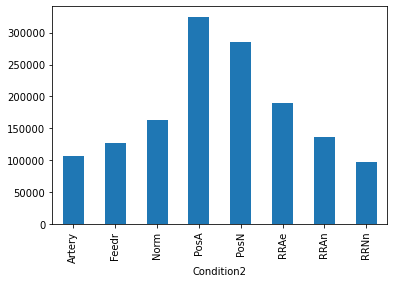

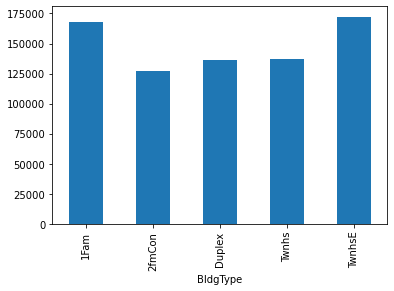

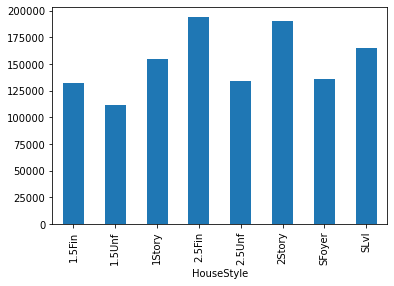

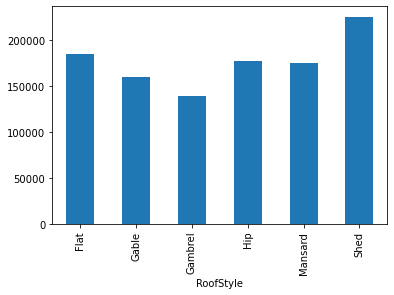

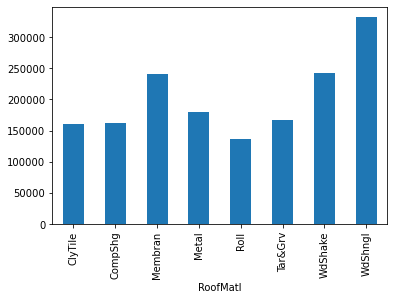

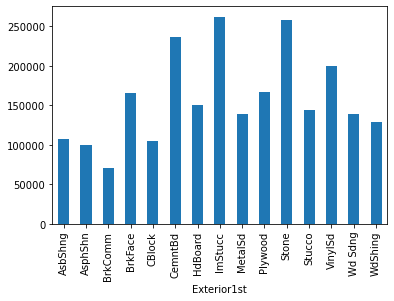

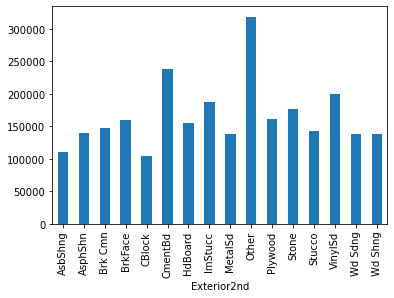

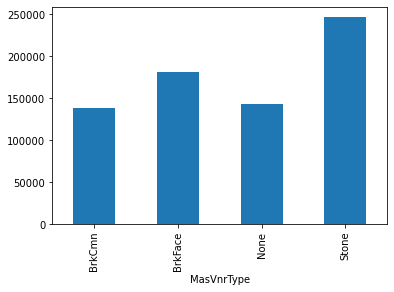

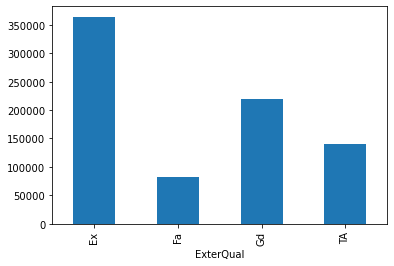

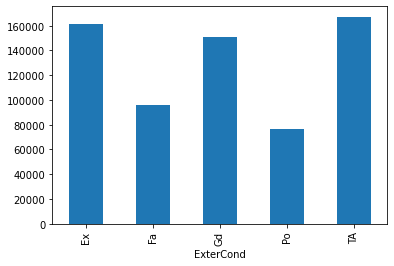

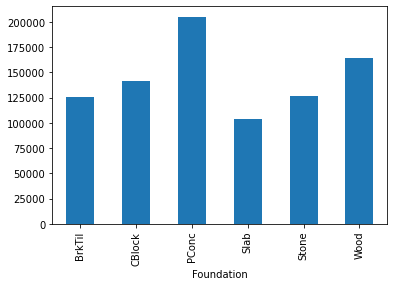

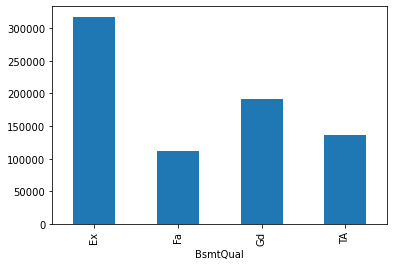

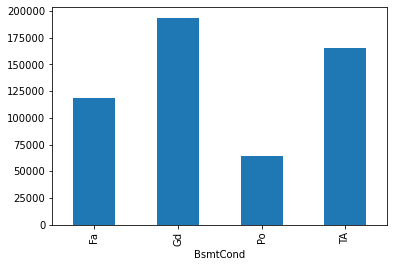

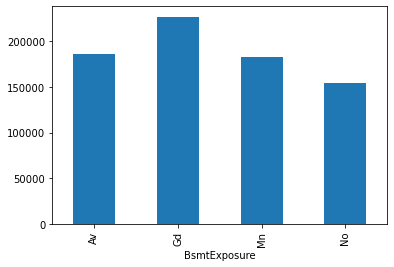

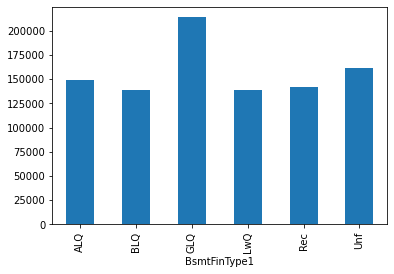

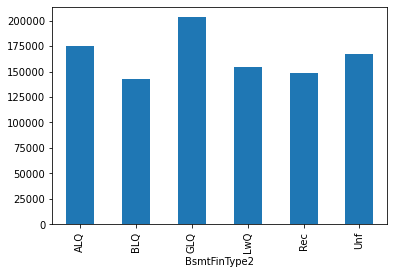

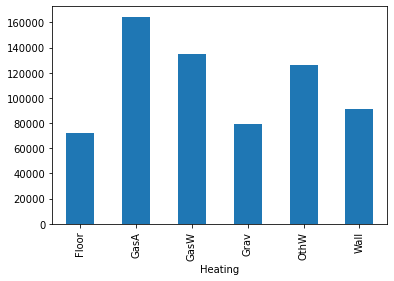

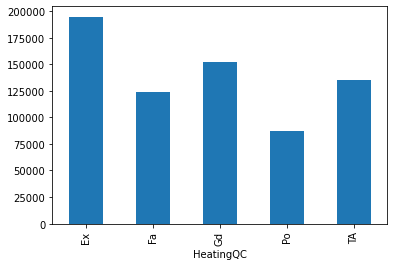

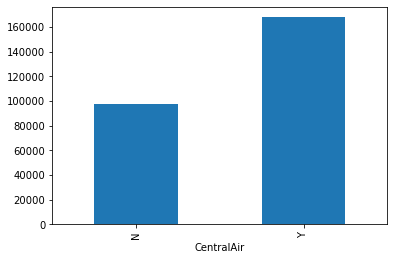

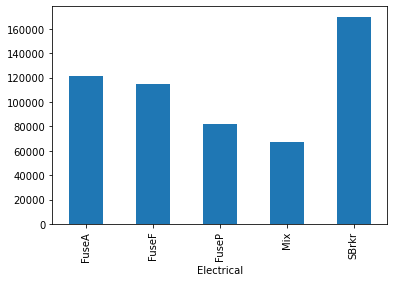

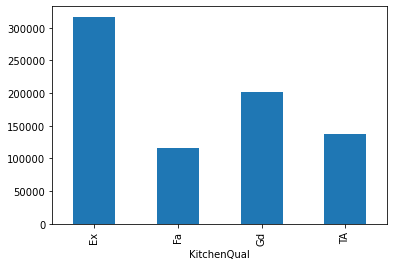

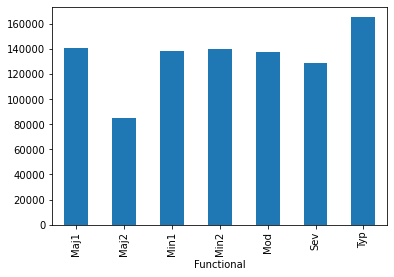

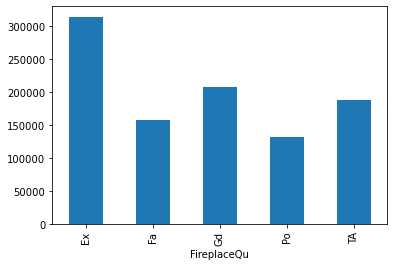

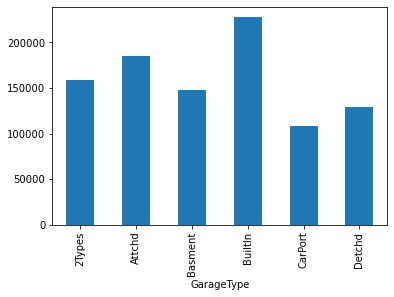

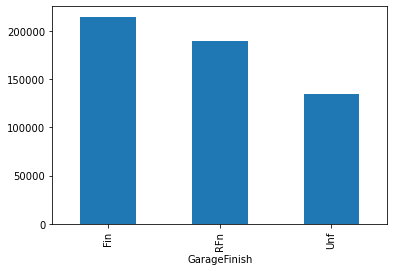

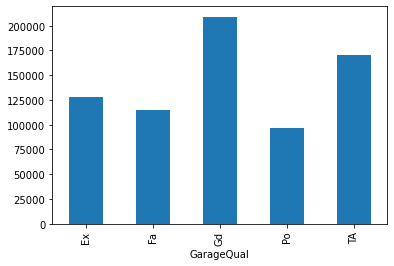

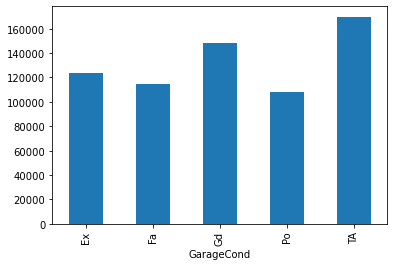

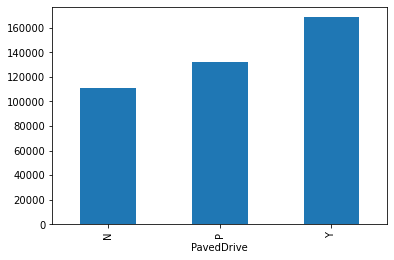

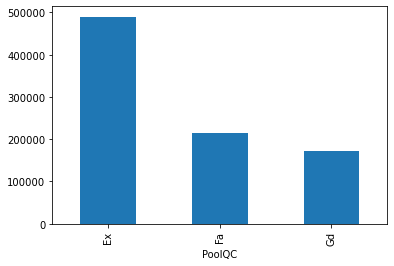

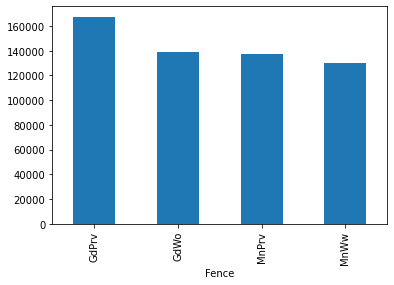

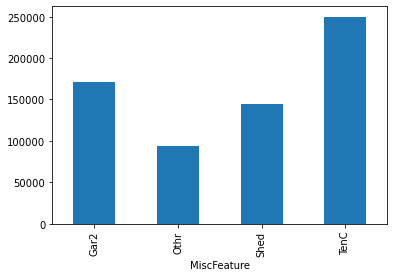

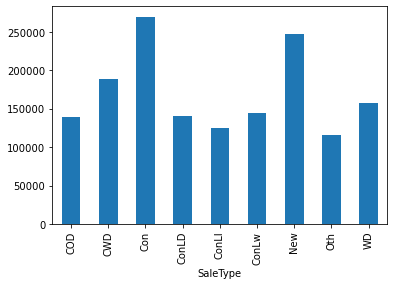

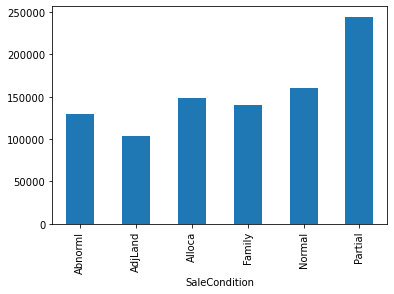

In [37]:
for feat in categorical_features:
    data = dataset.copy()
    
    data.groupby([feat])['SalePrice'].median().plot.bar()
    plt.show()

# End of data analysis

#  Feature Engineering

MISSING VALUES

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = dataset


In [40]:
y = dataset['SalePrice']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [42]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1962,1962,Gable,CompShg,HdBoard,HdBoard,BrkFace,189.0,TA,TA,CBlock,TA,TA,No,Rec,593,Unf,0,595,1188,GasA,TA,Y,SBrkr,1188,0,0,1188,0,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1962.0,Unf,1,312,TA,TA,P,261,39,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
871,872,60,RL,70.0,8750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,116.0,TA,TA,PConc,Gd,TA,No,GLQ,505,Unf,0,299,804,GasA,Ex,Y,SBrkr,804,878,0,1682,0,0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,1998.0,RFn,2,523,TA,TA,Y,0,77,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,200500
238,239,20,RL,93.0,12030,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2007,2007,Hip,CompShg,VinylSd,VinylSd,BrkFace,254.0,Ex,TA,PConc,Ex,TA,No,Unf,0,Unf,0,1694,1694,GasA,Ex,Y,SBrkr,1694,0,0,1694,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,Fin,3,818,TA,TA,Y,168,228,0,0,0,0,NaN,NaN,NaN,0,12,2007,New,Partial,318000
544,545,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,179665
620,621,30,RL,45.0,8248,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,3,3,1914,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,BrkTil,TA,TA,No,BLQ,41,Unf,0,823,864,GasA,TA,N,FuseF,864,0,0,864,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,67000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,361,85,RL,NaN,7540,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,6,6,1978,1978,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Av,GLQ,773,Unf,0,115,888,GasA,Ex,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1978.0,RFn,2,470,TA,TA,Y,0,0,0,0,192,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,156000
709,710,20,RL,NaN,7162,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,7,1966,1966,Gable,CompShg,HdBoard,HdBoard,BrkCmn,41.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,876,876,GasA,TA,Y,SBrkr,904,0,0,904,0,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1966.0,Unf,1,408,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2008,WD,Abnorml,109900
439,440,50,RL,67.0,12354,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,8,1920,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,Fa,Mn,Unf,0,Unf,0,684,684,GasA,Gd,Y,SBrkr,684,512,0,1196,0,0,1,0,3,1,Gd,7,Typ,0,NaN,Detchd,2005.0,Unf,2,528,TA,TA,Y,0,46,0,0,0,0,NaN,GdPrv,Shed,800,8,2009,ConLI,Normal,110000
174,175,20,RL,47.0,12416,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,6,5,1986,1986,Gable,CompShg,VinylSd,Plywood,Stone,132.0,TA,TA,CBlock,Gd,Fa,No,ALQ,1398,LwQ,2

In [43]:
y_train

1446    157900
871     200500
238     318000
544     179665
620      67000
         ...  
360     156000
709     109900
439     110000
174     184000
1146    180000
Name: SalePrice, Length: 1095, dtype: int64

In [44]:
num_nan_feat = [feat for feat in dataset.columns if dataset[feat].isnull().sum()>1 and feat in num_feature and feat not in year_feature]

In [45]:
num_nan_feat

['LotFrontage', 'MasVnrArea']

In [46]:
cate_nan_feat = [feat for feat in dataset.columns if dataset[feat].isnull().sum()>1 and feat in categorical_features and feat not in year_feature]

In [47]:
len(cate_nan_feat)

15

In [48]:
cate_nan_feat

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [49]:
dataset[cate_nan_feat]

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,None,Gd,TA,No,Unf,Unf,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
1456,NaN,Stone,Gd,TA,No,ALQ,Rec,TA,Attchd,Unf,TA,TA,NaN,MnPrv,NaN
1457,NaN,None,TA,Gd,No,GLQ,Unf,Gd,Attchd,RFn,TA,TA,NaN,GdPrv,Shed
1458,NaN,None,TA,TA,Mn,GLQ,Rec,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN


In [50]:
dataset.isnull().sum().head(10)

Id                0
MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley          1369
LotShape          0
LandContour       0
Utilities         0
dtype: int64

In [51]:
def impute_cate_nan(dataset,cate_nan_feat):
    df = dataset.copy()
    df[cate_nan_feat] = df[cate_nan_feat].fillna('Missing')
    return df
    

In [52]:
dataset = impute_cate_nan(dataset,cate_nan_feat)

In [53]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Missing,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAm

In [54]:
df = dataset.copy()

In [55]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Missing,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAm

In [56]:
for feat in num_nan_feat:
    median = X_train[feat].median()

    X_train[feat] = X_train[feat].fillna(median)
    

<ipython-input-56-8f1f5ec8c4ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feat] = X_train[feat].fillna(median)


In [57]:
for feat in num_nan_feat:
    median = X_test[feat].median()

    X_test[feat] = X_test[feat].fillna(median)

<ipython-input-57-45f9ef58804b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feat] = X_test[feat].fillna(median)


In [58]:
X_test['LotFrontage'].isnull().sum()

0

In [59]:
dataset = pd.concat([X_train,X_test]).sort_index()

In [60]:
dataset['LotFrontage'].isnull().sum()

0

In [61]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [62]:
df1 = dataset.copy()

In [63]:
dataset[year_feature].isnull().sum()

YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
YrSold           0
dtype: int64

In [64]:
dataset['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [65]:
dataset['GarageYrBlt'].median()

1980.0

In [66]:
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(dataset['GarageYrBlt'].median())

In [67]:
dataset[year_feature].isnull().sum()

YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
YrSold          0
dtype: int64

In [68]:
dataset[categorical_features].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [69]:
dataset = impute_cate_nan(dataset,cate_nan_feat)

In [70]:
dataset[categorical_features].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       1
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [71]:
len(categorical_features)+len(num_feature)

81

# Some numerical variavles are skwed  

# Perform Log nornal distribution

In [72]:
num_feat_skwed = ['LotFrontage','GrLivArea','1stFlrSF','SalePrice','LotArea']

In [73]:
for feat in num_feat_skwed:
    dataset[feat] = np.log(dataset[feat])

In [74]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,4.127134,8.976768,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,6.859615,694,0,7.406711,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.072541
1456,1457,20,RL,4.442651,9.486076,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,7.636752,0,0,7.636752,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,12.254863
1457,1458,70,RL,4.189655,9.109636,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,7.080026,1152,0,7.757906,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941

In [75]:
for feat in year_feature:
    if feat == 'YrSold':
        pass
    else:
        dataset[feat] = dataset['YrSold']-dataset[feat]

In [76]:
dataset[year_feature]

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008
...,...,...,...,...
1455,8,7,8.0,2007
1456,32,22,32.0,2010
1457,69,4,69.0,2010
1458,60,14,60.0,2010


In [77]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,4.127134,8.976768,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,8,7,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,6.859615,694,0,7.406711,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,8.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.072541
1456,1457,20,RL,4.442651,9.486076,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,32,22,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,7.636752,0,0,7.636752,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,32.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,Missing,MnPrv,Missing,0,2,2010,WD,Normal,12.254863
1457,1458,70,RL,4.189655,9.109636,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,69,4,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,7.080026,1152,0,7.757906,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,69.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,Missing,GdPrv,Shed,2500,5,20

In [78]:
df2 = dataset.copy()

In [79]:
df2.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216
5,6,50,RL,4.442651,9.554993,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,16,14,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.679599,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,16.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870600
6,7,20,RL,4.317488,9.218705,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,3,2,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,3.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,12.634603
7,8,60,RL,4.234107,9.247829,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,36,36,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,7.009409,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,36.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,12.206073
8,9,50,RM,3.931826,8.719317,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,77,58,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,6.929517,752,0,7.480992,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,77.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,Mis

In [80]:
for feat in categorical_features:
    label = df2.groupby(feat)['SalePrice'].mean().sort_values().index
    label = {k:i for i,k in enumerate(label,0)}
    df2[feat] = df2[feat].map(label)

In [81]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,15,3,4,3,6,7,5,5,5,1,2,12,13,2,196.0,2,3,5,3,3,1,6,706,5,0,150,856,5,4,1,4.0,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,1,5,5.0,2,2,548,3,5,2,0,61,0,0,0,0,0,4,2,0,2,2008,4,4,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,20,1,4,3,4,6,8,31,31,1,2,6,6,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,5,4,1,4.0,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,6,1,3,5,31.0,2,2,460,3,5,2,298,0,0,0,0,0,0,4,2,0,5,2007,4,4,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,15,3,4,3,6,7,5,7,6,1,2,12,13,2,162.0,2,3,5,3,3,2,6,486,5,0,434,920,5,4,1,4.0,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,3,5,7.0,2,2,608,3,5,2,0,42,0,0,0,0,0,4,2,0,9,2008,4,4,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,17,3,4,3,6,7,5,91,36,1,2,4,7,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,5,3,1,4.0,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,4,2,8.0,1,3,642,3,5,2,0,35,272,0,0,0,0,4,2,0,2,2006,4,1,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,24,3,4,3,6,8,5,8,8,1,2,12,13,2,350.0,2,3,5,3,3,3,6,655,5,0,490,1145,5,4,1,4.0,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,3,5,8.0,2,3,836,3,5,2,192,84,0,0,0,0,0,4,2,0,12,2008,4,4,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,4.127134,8.976768,1,2,0,1,1,0,0,14,3,4,3,6,6,5,8,7,1,2,12,13,1,0.0,1,3,5,3,3,1,5,0,5,0,953,953,5,4,1,4.0,6.859615,694,0,7.406711,0,0,2,1,3,1,1,7,6,1,3,5,8.0,2,2,460,3,5,2,0,40,0,0,0,0,0,4,2,0,8,2007,4,4,12.072541
1456,1457,20,3,4.442651,9.486076,1,2,0,1,1,0,0,13,3,4,3,4,6,6,32,22,1,2,9,10,4,119.0,1,3,2,3,3,1,4,790,2,163,589,1542,5,2,1,4.0,7.636752,0,0,7.636752,1,0,2,0,3,1,1,7,5,2,3,5,32.0,1,2,500,3,5,2,349,0,0,0,0,0,0,2,2,0,2,2010,4,4,12.254863
1457,1458,70,3,4.189655,9.109636,1,2,0,1,1,0,0,17,3,4,3,6,7,9,69,4,1,2,11,12,1,0.0,3,2,3,2,4,1,6,275,5,0,877,1152,5,4,1,4.0,7.080026,1152,0,7.757906,0,0,2,0,4,1,2,9,6,2,4,5,69.0,2,1,252,3,5,2,0,60,0,0,0,0,0,3,1,2500,5,2010,4,4,12.493130
1458,1459,20,3,4.219508,9.181632,1,2,0,1,1,0,0,10,3,4,3,4,5,6,60,14,4,2,6,6,1,0.0,1,3,2,2,3,2,6,49,2,1029,0,1078,5,3,1,3.0,6.982863,0,0,6.982863,1,0,1,0,2,1,2,5,6,0,1,5,60.0,1,1,240,3,5,2,366,0,112,0,0,0,0,4,2,0,4,2010,4,4,11.864462


In [82]:
dataset = df2.copy()

In [83]:
dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,0,0,15,3,4,3,6,7,5,5,5,1,2,12,13,2,196.0,2,3,5,3,3,1,6,706,5,0,150,856,5,4,1,4.0,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,1,5,5.0,2,2,548,3,5,2,0,61,0,0,0,0,0,4,2,0,2,2008,4,4,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,2,0,20,1,4,3,4,6,8,31,31,1,2,6,6,1,0.0,1,3,2,3,3,4,4,978,5,0,284,1262,5,4,1,4.0,7.140453,0,0,7.140453,0,1,2,0,3,1,1,6,6,1,3,5,31.0,2,2,460,3,5,2,298,0,0,0,0,0,0,4,2,0,5,2007,4,4,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,0,0,15,3,4,3,6,7,5,7,6,1,2,12,13,2,162.0,2,3,5,3,3,2,6,486,5,0,434,920,5,4,1,4.0,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,3,5,7.0,2,2,608,3,5,2,0,42,0,0,0,0,0,4,2,0,9,2008,4,4,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,1,0,17,3,4,3,6,7,5,91,36,1,2,4,7,1,0.0,1,3,1,2,4,1,4,216,5,0,540,756,5,3,1,4.0,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,4,2,8.0,1,3,642,3,5,2,0,35,272,0,0,0,0,4,2,0,2,2006,4,1,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,2,0,24,3,4,3,6,8,5,8,8,1,2,12,13,2,350.0,2,3,5,3,3,3,6,655,5,0,490,1145,5,4,1,4.0,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,3,5,8.0,2,3,836,3,5,2,192,84,0,0,0,0,0,4,2,0,12,2008,4,4,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,4.127134,8.976768,1,2,0,1,1,0,0,14,3,4,3,6,6,5,8,7,1,2,12,13,1,0.0,1,3,5,3,3,1,5,0,5,0,953,953,5,4,1,4.0,6.859615,694,0,7.406711,0,0,2,1,3,1,1,7,6,1,3,5,8.0,2,2,460,3,5,2,0,40,0,0,0,0,0,4,2,0,8,2007,4,4,12.072541
1456,1457,20,3,4.442651,9.486076,1,2,0,1,1,0,0,13,3,4,3,4,6,6,32,22,1,2,9,10,4,119.0,1,3,2,3,3,1,4,790,2,163,589,1542,5,2,1,4.0,7.636752,0,0,7.636752,1,0,2,0,3,1,1,7,5,2,3,5,32.0,1,2,500,3,5,2,349,0,0,0,0,0,0,2,2,0,2,2010,4,4,12.254863
1457,1458,70,3,4.189655,9.109636,1,2,0,1,1,0,0,17,3,4,3,6,7,9,69,4,1,2,11,12,1,0.0,3,2,3,2,4,1,6,275,5,0,877,1152,5,4,1,4.0,7.080026,1152,0,7.757906,0,0,2,0,4,1,2,9,6,2,4,5,69.0,2,1,252,3,5,2,0,60,0,0,0,0,0,3,1,2500,5,2010,4,4,12.493130
1458,1459,20,3,4.219508,9.181632,1,2,0,1,1,0,0,10,3,4,3,4,5,6,60,14,4,2,6,6,1,0.0,1,3,2,2,3,2,6,49,2,1029,0,1078,5,3,1,3.0,6.982863,0,0,6.982863,1,0,1,0,2,1,2,5,6,0,1,5,60.0,1,1,240,3,5,2,366,0,112,0,0,0,0,4,2,0,4,2010,4,4,11.864462


In [84]:
#df2.groupby('LotConfig')['SalePrice'].mean().sort_values().index

Int64Index([0, 1, 2, 3, 4], dtype='int64', name='LotConfig')

In [85]:
#label_LotConfig = df2.groupby('LotConfig')['SalePrice'].mean().sort_values().index
#for k,i  in enumerate(label,0):
    #print({i,k})

{0, 'AdjLand'}
{1, 'Abnorml'}
{'Family', 2}
{3, 'Alloca'}
{'Normal', 4}
{'Partial', 5}


In [86]:
scaling_feat = [feat for feat in dataset.columns if feat not in ['Id','SalePrice'] ]

In [87]:
scaling_feat

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
scaler = MinMaxScaler()

In [93]:
scaler.fit_transform(dataset[scaling_feat])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.5       , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.49506375, ..., 0.25      , 0.5       ,
        0.8       ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.5       , 0.5       ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.434909  , ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.47117546, ..., 0.5       , 0.5       ,
        0.8       ]])

In [94]:
scaled_dataset = pd.DataFrame(scaler.fit_transform(dataset[scaling_feat]),columns=scaling_feat)

In [95]:
scaled_dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.036765,0.098361,0.2,0.285714,0.857143,0.866667,0.50,0.122500,0.666667,0.75,1.0,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.0,1.00,1.0,1.00,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.000000,0.000000,0.2,0.833333,0.046729,0.666667,0.50,0.386460,0.6,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.090909,0.50,0.5,0.8
1,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.833333,0.125,0.571429,0.75,0.571429,0.555556,0.875,0.227941,0.524590,0.2,0.285714,0.428571,0.400000,0.25,0.000000,0.333333,0.75,0.4,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.0,1.00,1.0,1.00,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.000000,0.333333,0.6,0.833333,0.289720,0.666667,0.50,0.324401,0.6,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.363636,0.25,0.5,0.8
2,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.051471,0.114754,0.2,0.285714,0.857143,0.866667,0.50,0.101250,0.666667,0.75,1.0,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.0,1.00,1.0,1.00,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.000000,0.333333,0.6,0.833333,0.065421,0.666667,0.50,0.428773,0.6,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.727273,0.50,0.5,0.8
3,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.708333,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.669118,0.606557,0.2,0.285714,0.285714,0.466667,0.25,0.000000,0.333333,0.75,0.2,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.0,0.75,1.0,1.00,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.000000,0.333333,0.8,0.333333,0.074766,0.333333,0.75,0.452750,0.6,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.090909,0.00,0.5,0.2
4,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.375,0.571429,0.75,0.857143,0.777778,0.500,0.058824,0.147541,0.2,0.285714,0.857143,0.866667,0.50,0.218750,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.000000,0.209760,0.187398,1.0,1.00,1.0,1.00,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.000000,0.333333,0.6,0.833333,0.074766,0.666667,0.75,0.589563,0.6,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,1.000000,0.50,0.5,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.235294,0.75,0.400718,0.353592,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.583333,0.375,0.571429,0.75,0.857143,0.555556,0.50

In [96]:
data = pd.concat([dataset[['Id','SalePrice']].reset_index(drop=True),scaled_dataset],axis= 1)

In [97]:
data

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.036765,0.098361,0.2,0.285714,0.857143,0.866667,0.50,0.122500,0.666667,0.75,1.0,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.0,1.00,1.0,1.00,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.000000,0.000000,0.2,0.833333,0.046729,0.666667,0.50,0.386460,0.6,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.090909,0.50,0.5,0.8
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.833333,0.125,0.571429,0.75,0.571429,0.555556,0.875,0.227941,0.524590,0.2,0.285714,0.428571,0.400000,0.25,0.000000,0.333333,0.75,0.4,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.0,1.00,1.0,1.00,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.000000,0.333333,0.6,0.833333,0.289720,0.666667,0.50,0.324401,0.6,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.363636,0.25,0.5,0.8
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.051471,0.114754,0.2,0.285714,0.857143,0.866667,0.50,0.101250,0.666667,0.75,1.0,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.0,1.00,1.0,1.00,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.000000,0.333333,0.6,0.833333,0.065421,0.666667,0.50,0.428773,0.6,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.727273,0.50,0.5,0.8
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.708333,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.669118,0.606557,0.2,0.285714,0.285714,0.466667,0.25,0.000000,0.333333,0.75,0.2,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.0,0.75,1.0,1.00,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.000000,0.333333,0.8,0.333333,0.074766,0.333333,0.75,0.452750,0.6,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.090909,0.00,0.5,0.2
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.375,0.571429,0.75,0.857143,0.777778,0.500,0.058824,0.147541,0.2,0.285714,0.857143,0.866667,0.50,0.218750,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.000000,0.209760,0.187398,1.0,1.00,1.0,1.00,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.000000,0.333333,0.6,0.833333,0.074766,0.666667,0.75,0.589563,0.6,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,1.000000,0.50,0.5,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,12.072541,0.235294,0.75,0.400718,0.3

<AxesSubplot:>

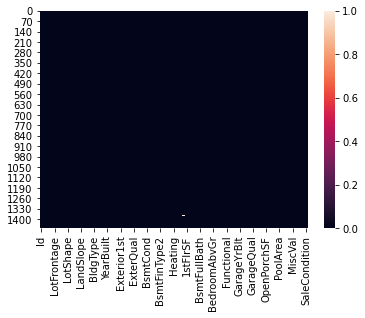

In [99]:
sns.heatmap(data.isnull())

In [100]:
data.columns

Index(['Id', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond'

In [101]:
data['Electrical'].isnull().sum()

1

In [102]:
data = data.dropna()

In [103]:
data

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.036765,0.098361,0.2,0.285714,0.857143,0.866667,0.50,0.122500,0.666667,0.75,1.0,0.75,0.75,0.25,1.000000,0.125089,0.833333,0.000000,0.064212,0.140098,1.0,1.00,1.0,1.00,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.000000,0.000000,0.2,0.833333,0.046729,0.666667,0.50,0.386460,0.6,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.090909,0.50,0.5,0.8
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.833333,0.125,0.571429,0.75,0.571429,0.555556,0.875,0.227941,0.524590,0.2,0.285714,0.428571,0.400000,0.25,0.000000,0.333333,0.75,0.4,0.75,0.75,1.00,0.666667,0.173281,0.833333,0.000000,0.121575,0.206547,1.0,1.00,1.0,1.00,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,1.000000,0.333333,0.6,0.833333,0.289720,0.666667,0.50,0.324401,0.6,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.363636,0.25,0.5,0.8
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.625000,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.051471,0.114754,0.2,0.285714,0.857143,0.866667,0.50,0.101250,0.666667,0.75,1.0,0.75,0.75,0.50,1.000000,0.086109,0.833333,0.000000,0.185788,0.150573,1.0,1.00,1.0,1.00,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.000000,0.333333,0.6,0.833333,0.065421,0.666667,0.50,0.428773,0.6,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.727273,0.50,0.5,0.8
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.708333,0.375,0.571429,0.75,0.857143,0.666667,0.500,0.669118,0.606557,0.2,0.285714,0.285714,0.466667,0.25,0.000000,0.333333,0.75,0.2,0.50,1.00,0.25,0.666667,0.038271,0.833333,0.000000,0.231164,0.123732,1.0,0.75,1.0,1.00,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.000000,0.333333,0.8,0.333333,0.074766,0.333333,0.75,0.452750,0.6,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,0.090909,0.00,0.5,0.2
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.000000,0.375,0.571429,0.75,0.857143,0.777778,0.500,0.058824,0.147541,0.2,0.285714,0.857143,0.866667,0.50,0.218750,0.666667,0.75,1.0,0.75,0.75,0.75,1.000000,0.116052,0.833333,0.000000,0.209760,0.187398,1.0,1.00,1.0,1.00,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.000000,0.333333,0.6,0.833333,0.074766,0.666667,0.75,0.589563,0.6,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.00,0.50,0.00000,1.000000,0.50,0.5,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,12.072541,0.235294,0.75,0.400718,0.3

In [104]:
data.to_csv('House_data_scaled',index=False)